* [Theory: Long Version](#Theory:-Long-Version)
* [Phase Portrait: Continuous RLC Electrical Circuit Problem](#Continuous-Case)
* [Phase Portrait: Discrete Astronaut Problem](#Discrete-Case)

## Chapter 5.3 Phase Portraits

### Theory: Short Version

* Phase Portraits combine the earlier vector plot (a graphical unit) with the eigenvalue method to create a graphical description of the dynamical system over the entire state space. The are important in the analysis of nonlinear dynamical systems because in most cases perfect analytical solutions are hard to come by.

### Theory: Long Version

* Recall that if we're given a dynamical system $x' = f(x)$, $x = (x_1, ....,x_n)$ is an element of the state space $S \subseteq R^N $ and $F = (f_1,...,f_n)$ is the continuous first partials in the neighborhood of an equilibrium point, $x_0$.

* Also recall that even if  $x' = F(x)$ is not linear, we have the following: $$\space$$ $$F(x) \approx A(x - x_0)$$ $$\space$$ in the neighborhood of the equilibrium point.

    * Basically we have the linear approximation which is equivalent to the non-linear dynamical model around the equilibrium point. 
    
    
* The phase portrait itself is simply the sketch of the state space showing a representative selection of the solution curves (graphing the solution curves for a few initial conditions).


* The reason why we can create a phase portrait of the state space of a non-linear dynamical system using a linear approximation, is not only because the linear approximation is equivalent to the non-linear dynamical model around the equilibrium point. ***It's also because of the principle called homeomorphism.*** 

***Homeomorphism.*** 

* Describes a continuous function that has a continuous inverse. 


* The general idea of homeomorphism involves the shape and generic properties of these continuous functions. 
    * If the function is homeomorphic, the shape of the function can change from circle to an ellipse, another circle, triangle, to square but never a figure 8 (no inverse) or a line (this would violate continuity). 

***Thus we have a theorem that states the following:***

* If there's an equilibrium point (that is, if the eigenvalues of the system have all nonzero real parts), then there is a homeomorphism that maps the phase portrait of the linear approximation, $x' = Ax$, to the non-linear system, $x' = F(x)$, around the equilibrium point (albeit w/ some distortion).
    


### Continuous Case




#### RLC Circuit Example

#### Variables

$v_C = \text{Voltage across Capacitor}$  
$i_C = \text{current through Capacitor}$  
$v_R = \text{Voltage across resistor}$  
$i_R = \text{current through resistor}$  
$v_L = \text{Voltage across inductor}$  
$i_L = \text{current through inductor}$  

#### Assumptions

$C \frac{dv_C}{dt} = i_C $  

$v_R = f(i_R)$  

$L \frac{di_L}{dt} = v_L $  

$i_R = i_L = i_C$  
$v_R + v_L + v_C = 0$  
$L = 1$  
$C = \frac{1}{3}$  
$f(x) = x^3+ 4x$

$f(x_1,x_2) = -x^3 - 4x_1- x_2$  
$f(x_1,x_2) = 3x_1$

#### Objective

Determine the behavior of all six variables over time

### Modules

In [1]:
# Modules being called
import math as m
import numpy as np
from sympy.solvers import solve
import sympy as sp
from matplotlib import pyplot as plt
import scipy.linalg as sci
import scipy.integrate as scint

### Variables

In [2]:
# Writing the Model for the deer population
x1, x2 = sp.symbols('x1 x2')


# init_session() displays LaTeX version of outputs; 'quiet= True' stops 
# init_session from printing messages regarding its status
sp.init_printing()

### Sympy Rendition

In [3]:
# Output
dx1dt = -x1**3 - 4*x1 - x2
dx2dt = 3*x1
(dx1dt, dx2dt)

### Equilibrium Points

***(a) The equilibrium points are shown below. They occur when $\frac{dx1}{dt} = \frac{dx2}{dt} = 0$***

In [4]:
# Solution to the model(Equilibrium Point)

equilibrium_points = solve([dx1dt, dx2dt], x1, x2)
print('Equilibrium Point: {}'.format(equilibrium_points[0]))

Equilibrium Point: (0, 0)


### Lambda Functions

In [5]:
dx1_dt = lambda x1_, x2_: -x1_**3 - 4*x1_ - x2_
dx2_dt = lambda x1_, x2_: 3*x1_

### Functions

In [6]:
def plot_traj(ax1, g1, g2, x0, t, args=(), color='black', lw=2):
    """
    Plots a vector field plot.
    
    Parameters
    ----------
    ax : Matplotlib Axis instance
        Axis on which to make the plot
    g1 : function of the form g1(x1_)
        1/2 The right-hand-side of the dynamical system.
    g2 : function of the form g2(x1_)
        1/2 The right-hand-side of the dynamical system.
    x0 : array_like, shape (2,)
        Initial conditions of for the trajectory lines.  
    t : array_like
        Time points for trajectory.
    args : tuple, default ()
        Additional arguments to be passed to f
    color : Color of the trajectory lines.
        Set to 'black'
    linewidth: abbreviated as 'lw'. Default Value = 2
        
    Returns
    -------
    output : Matplotlib Axis instance
        Axis with streamplot included.
    """
    
    # Creates the set of points initialized by the parameter 'x'
    # for the difference equations g1 = -x1**3 - 4*x1 - x2; g2 = 3*x1
    def func(x,t):
        x_1, x_2 = x
        G1 = g1(x_1,x_2)
        G2 = g2(x_1,x_2)
        return [G1,G2]
    
    soln = scint.odeint(func, x0, t, args=args)
    ax1.plot(*soln.transpose(), color=color, lw=lw)
    return ax1 

### Plotting VectorField Plot

In [7]:
def plot_vector_field(func1, func2, start= -3, stop= 3):
    """
    Plots a trajectory on a phase portrait.
    
    Parameters
    ----------
    func1 : function for form func1(y, t, *args)
        The right-hand-side of the dynamical system.
        Must return a 2-array.
    start : integer. Default value = 3
        The starting value. 
    stop : integer. Default value = 3
        The ending value
    color : Color of the trajectory lines.
        Set to 'black'
    linewidth: abbreviated as 'lw'. Default Value = 2
        
    Returns
    -------
    output : Matplotlib Axis instance
        Axis with streamplot included.
    """
    #----------------------------------------------------------------------------------
    # Creates the superimposed plot for stream plot of the model, as well as dPdt = 0
    #----------------------------------------------------------------------------------

    # Part 1: Creates the length of the 'X' and 'Y' Axis 
    x, y = np.linspace(start, stop), np.linspace(start, stop)
    X, Y = np.meshgrid(x, y)

    # Part 2: The approximated points of the function dx1/dt and dx2/dt which we'll use for the plot.
    U, V = func1(X, Y), func2(X, Y)

    # Part 3: Creating the figure for the plot
    fig, ax1 = plt.subplots()

    # Part 4: Sets the axis, and equilibrium information for the plot
    Title, xLabel, yLabel = input('Title?: '), input('x-axis label?: '), input('y-axis label?: ')
    ax1.set(title= Title, xlabel= xLabel, ylabel = yLabel)

    # Part 5: Plots the streamplot which represents the vector plot.
    ax1.streamplot(X, Y, U, V)
    ax1.grid()
    return ax1

Title?: x1 vs x2 Population
x-axis label?: x1 Population
y-axis label?: x2 Population


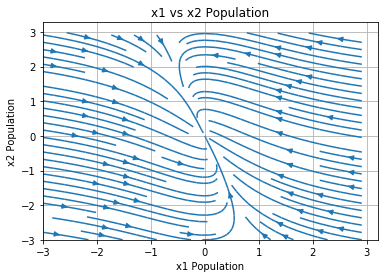

In [8]:
plot_vector_field(dx1_dt, dx2_dt)

### Jacobian Matrix

In [9]:
### Jacobian Matrix

def poorManJacobian(func1, func2, var1, var2, points, Jac_matrix_On= True):
    """
    Plots the phase portrait of the actual dynamical system.
    
    Parameters
    ----------
    func1,func2 : sympy data type called for form sympy.core.add.Add.
        The data types of the functions we define using sympy.
        It just returns sympy.core.add.Add.
    var1, var2 : sympy data type called for form sympy.core.symbol.Symbol.
        The data types of the variables we define using sympy.
        It just returns sympy.core.symbol.Symbol.
    A_matrix_On : just a boolean check to return different things.
        If it's 'True' the it just returns the Jacobian w/o being
        evaluated at certain values of x1 and x2. 
        Default value is 'True'
        
    Returns
    -------
    output : Matplotlib Axis instance
        Axis with streamplot included.
    """
    if Jac_matrix_On:
        Jac_matrix = sp.Array([[sp.diff(func1, var1), sp.diff(func1, var2)], 
                             [sp.diff(func2, var1), sp.diff(func2, var2)]])
        return Jac_matrix
    else:
        for point in points:
            solMatrix = np.array([[float(sp.diff(func1, var1).subs({var1:point[0], var2:point[1]})), 
                            float(sp.diff(func1, var2).subs({var1:point[0], var2:point[1]}))], 
                           [float(sp.diff(func2, var1).subs({var1:point[0], var2:point[1]})), 
                            float(sp.diff(func2, var2).subs({var1:point[0], var2:point[1]}))]])
            return solMatrix

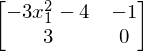

In [10]:
points = [[0, 0]]
poorManJacobian(dx1dt, dx2dt, x1, x2, points)

### Setting up the Matrix

In [11]:
solMatrix1 = poorManJacobian(dx1dt, dx2dt, x1, x2, points, False)
solMatrix1

array([[-4., -1.],
       [ 3.,  0.]])

### Eigenvalues

In [12]:
eigenvalues1, eigenvectors1 = sci.eig(solMatrix1)

**For $(x_1 = 0, x_2 = 0)$, both eigenvalues have negative real parts which make it stable.**

In [13]:
eigenvalues1

array([-3.+0.j, -1.+0.j])

### Eigenvectors

**For $(x_1 = 0, x_2 = 0)$.**

In [14]:
eigenvectors1

array([[-0.70710678,  0.31622777],
       [ 0.70710678, -0.9486833 ]])

### Phase Plot Function

In [35]:
def phasePortrait(func1, func2, points, start= -3, stop= 3, 
                  jacobian_00= 4/5 , jacobian_01= -1/10, discreteON = False):
    """
    Plots the phase portrait of the actual dynamical system.
    
    Parameters
    ----------
    func1 : function for form func1(y, t, *args)
        The right-hand-side of the dynamical system.
        Must return a 2-array.
    start : integer. Default value = 3
        The starting value. 
    stop : integer. Default value = 3
        The ending value
    color : Color of the trajectory lines.
        Set to 'black'
    linewidth : abbreviated as 'lw'. Default Value = 2
    discreteON : boolean, 
        True for Phase Portrait of Discrete Systems
        False for Phase Portraits of Continuous Systems.
        Default is False.
        
    Returns
    -------
    output : Matplotlib Axis instance
        Axis with streamplot included.
    """
    if discreteON == False:
        #----------------------------------------------------------------------------------
        # Creates the superimposed plot for stream plot of the model, as well as dPdt = 0
        #----------------------------------------------------------------------------------

        # Part 1: Creates the length of the 'X' and 'Y' Axis  and the time vector
        x, y = np.linspace(start, stop), np.linspace(start, stop)
        X, Y = np.meshgrid(x, y)
        t = np.linspace(0, 100, 5000)

        # Part 2: The approximated points of the function dx1/dt and dx2/dt which we'll use for the plot.
        U, V = func1(X, Y), func2(X, Y)

        # Part 3: Creating the figure for the plot
        fig, ax1 = plt.subplots()

        # Part 4: Sets the axis, and equilibrium information for the plot
        Title, xLabel, yLabel = input('Title?: '), input('x-axis label?: '), input('y-axis label?: ')
        ax1.set(title= Title, xlabel= xLabel, ylabel = yLabel)

        # Part 5: Plots the streamplot which represents the vector plot.
        ax1.streamplot(X, Y, U, V)
        ax1.grid()

        # Part 6: Plots the trajectory lines on the stream plot
        for point in points:
            plot_traj(ax1, func1, func2, point, t)
        return ax1
    else:
        #----------------------------------------------------------------------------------
        # Creates the superimposed plot for stream plot of the model, as well as dPdt = 0
        #----------------------------------------------------------------------------------

        # Part 1: Creates the length of the 'X' and 'Y' Axis  and the time vector
        x, y = np.linspace(start, stop), np.linspace(start, stop)
        X, Y = np.meshgrid(x, y)
        t = np.linspace(0, 100, 5000)

        # Part 2: The approximated points of the function dx1/dt and dx2/dt which we'll use for the plot.
        U, V = func1(X, Y), func2(X, Y)

        # Part 3: Creating the figure for the plot
        fig, ax1 = plt.subplots()

        # Part 4: Sets the axis, and equilibrium information for the plot
        Title, xLabel, yLabel = input('Title?: '), input('x-axis label?: '), input('y-axis label?: ')
        ax1.set(title= Title, xlabel= xLabel, ylabel = yLabel)

        # Part 5: Plots the streamplot which represents the vector plot.
        ax1.streamplot(X, Y, U, V)
        ax1.grid()
        
        # Part 6:
        nextTerm = lambda L: np.array([jacobian_00*L[0]+jacobian_01*L[1],L[0]])
        param=np.linspace(0,2*np.pi,200) 
        cosX=np.cos(param)
        sinY=np.sin(param)
        a=zip(cosX,sinY) 
        for i in range(N):
            a=map(nextTerm,a)
        ax1.scatter(a)
        return ax1

### Plot Phase Portrait of the Non Linear Dynamical System

Title?: x1 vs x2 Population 
x-axis label?: x1 Population
y-axis label?: x2 Population


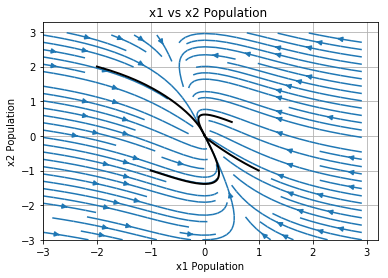

In [16]:
points = [[-2,2],[-1,-1],[0.5,0.4],[1, -1]]
phasePortrait(dx1_dt, dx2_dt, points)

### Plot Phase Portrait of the Linearized Dynamical System

* $x' = F(x) \approx Ax = \lambda x$
* Notice how the following graph is homeomorphic to the one above

In [17]:
dx1_dtL = lambda x1_, x2_: -3*x1_
dx2_dtL = lambda x1_, x2_: -1*x2_

Title?: x1 vs x2 Linearized
x-axis label?: x1 Population
y-axis label?: x2 Population


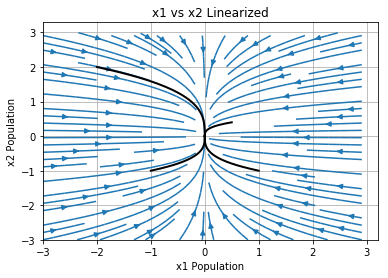

In [18]:
phasePortrait(dx1_dtL, dx2_dtL, points)

### Discrete Case

## The Astronaut Problem

### Step 1: List all variables and Assumptions

**Variables**

$v_n = $ velocity at time step $n$

$c = $ time to make control adjustment

$w = $ wait time to next adjustment

$a_n = $ acceleration at time step $n$

**Assumptions**

$v_{n+1} = v_n + \Delta v_n$

$a_n = -kv_n$

$\Delta v_n = a_{n-1}\cdot c + a_n\cdot w$


**Objective**

Determine if $v_n\to 0$.

To make matters simpler, we define $x_1(n) = v_n$ and $x_2(n)=v_{n-1}$ as our state variables.

#### Symbolic Function

In [19]:
x1, x2 = sp.symbols('x1 x2')
delta_X1, delta_X2 = -0.1*8*x1-0.1*5*x2, x1-x2
G1, G2 = x1 + delta_X1, x2 + delta_X2
solve([G1, G2], x1, x2)

#### Numerical Function

In [30]:
G1_ = lambda x1_, x2_: x1_ + (-0.1*8*x1_-0.1*5*x2_)
G2_ = lambda x1_, x2_: x2_ + (x1_- x2_)

### Plotting VectorField Plot

Title?: x1 vs x2 Population
x-axis label?: x1 Population
y-axis label?: x2 Population


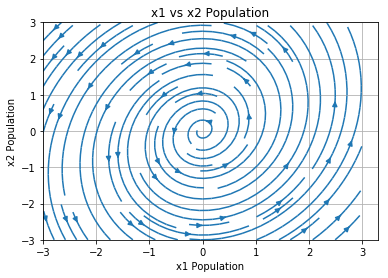

In [32]:
plot_vector_field(G1_, G2_)

### Jacobian Matrix

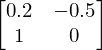

In [20]:
points = [[0, 0]]
poorManJacobian(G1, G2, x1, x2, points)

### Setting up the Matrix

In [21]:
solMatrix1 = poorManJacobian(G1, G2, x1, x2, points, False)
solMatrix1

array([[ 0.2, -0.5],
       [ 1. ,  0. ]])

### Eigenvalues

In [22]:
eigenvalues1, eigenvectors1 = sci.eig(solMatrix1)

**For $(x_1 = 0, x_2 = 0)$, both eigenvalues have positive real parts which make it unstable.**

In [23]:
eigenvalues1

array([0.1+0.7j, 0.1-0.7j])

### Eigenvectors

**For $(x_1 = 0, x_2 = 0)$.**

In [24]:
eigenvectors1

array([[0.08164966+0.57154761j, 0.08164966-0.57154761j],
       [0.81649658+0.j        , 0.81649658-0.j        ]])

### Plot Phase Portrait of the Non Linear Dynamical System

Title?: x1 vs x2 Population
x-axis label?: x1 Population
y-axis label?: x2 Population


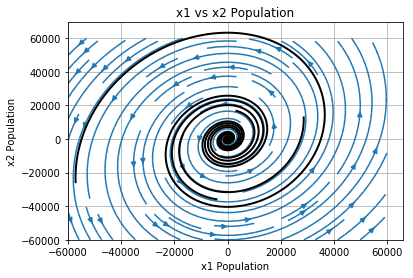

In [34]:
points = [[-2,2],[-1,-1],[0.5,0.4],[1, -1]]
phasePortrait(G1_, G2_, points, -60000, 60000)